<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#Task 1 Getting to Know the Data

In [3]:
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

#Task 2: Generate Descriptive Statistics and Visualizations

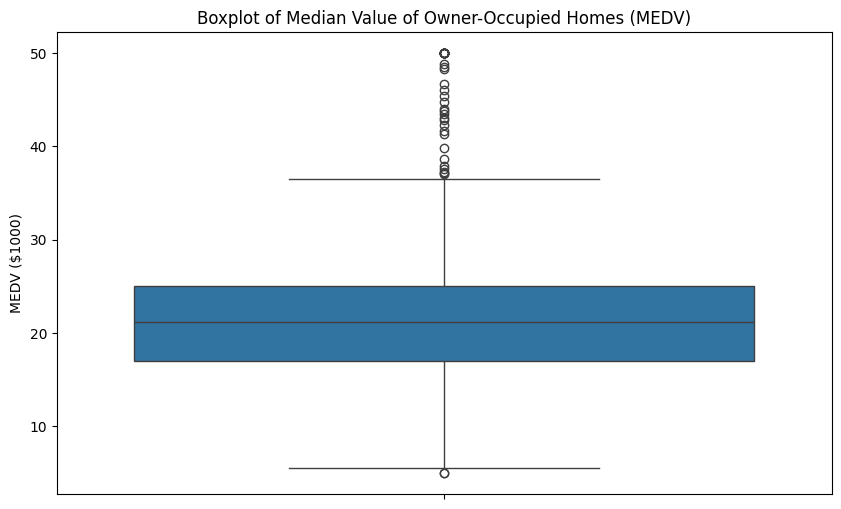

In [6]:
# Boxplot for MEDV
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000)')
plt.show()


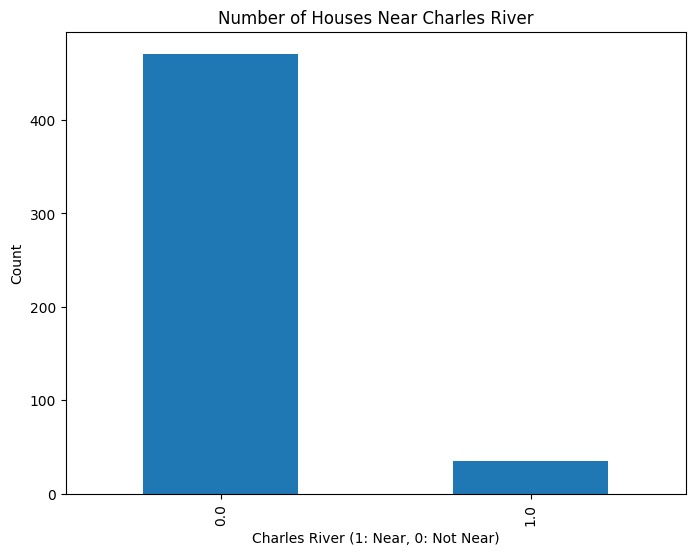

In [7]:
# Bar plot for CHAS
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Number of Houses Near Charles River')
plt.xlabel('Charles River (1: Near, 0: Not Near)')
plt.ylabel('Count')
plt.show()

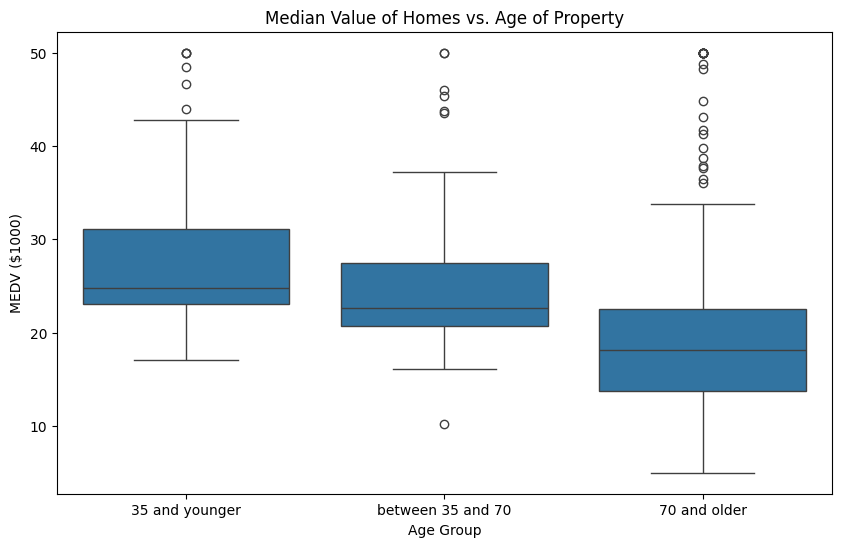

In [8]:
# Create age groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', 'between 35 and 70', '70 and older'])

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Homes vs. Age of Property')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000)')
plt.show()

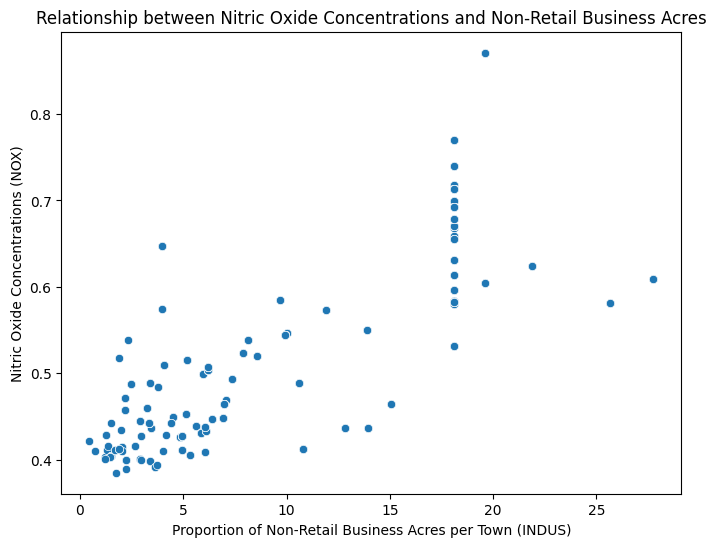

In [9]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

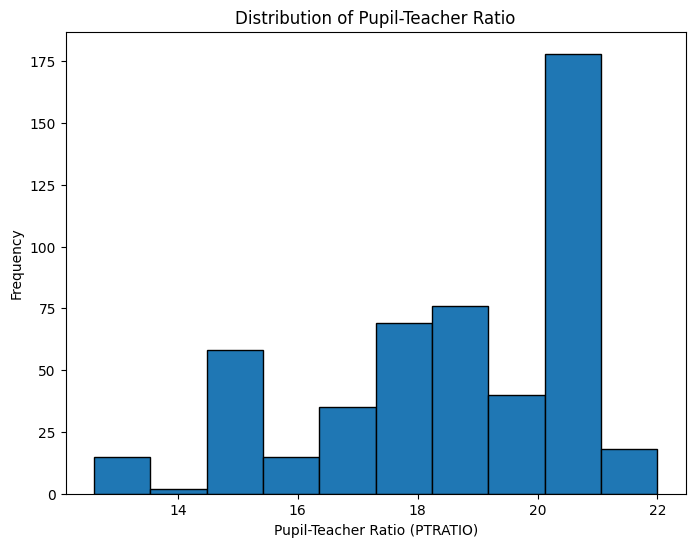

In [10]:
## Histogram for PTRATIO

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

#Task 3: Use the appropriate tests to answer the questions provided.

###Question 1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

####Hypothesis
####Null Hypothesis (H0): There is no difference in the median value of houses bounded by the Charles River compared to those that are not.
####Alternative Hypothesis (H1): There is a difference in the median value of houses bounded by the Charles River compared to those that are not.

In [11]:
# Separate the data into two groups based on CHAS
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_statistic, p_value = scipy.stats.ttest_ind(chas_yes, chas_no)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


###Interpretation:

After comparing the obtained p-value to your significance level (alpha = 0.05).

Since the p-value (7.39e-05) is much smaller than the common significance level of 0.05, we can reject the null hypothesis.

###Conclusion:

There is a statistically significant difference in the median value of houses bounded by the Charles River compared to those that are not.

##Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?

####Hypothesis

####Null Hypothesis (H0): There is no difference in the median values of houses across different age groups of properties.
####Alternative Hypothesis (H1): There is a difference in the median values of houses across different age groups of properties.

In [12]:
# Perform ANOVA
from statsmodels.formula.api import ols
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


###Interpretation:

The PR(>F) value here represents the p-value for the F-statistic. In this case, the p-value (1.71e-15) is extremely small, far less than the typical significance level of 0.05.

###Conclusion:

We can confidently reject the null hypothesis. This indicates that there is a statistically significant difference in median house values (MEDV) across the different age groups of properties.

##Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres?

####Hypothesis

####Null Hypothesis (H0): There is no relationship (correlation) between nitric oxide concentrations and the proportion of non-retail business acres.
####Alternative Hypothesis (H1): There is a relationship (correlation) between nitric oxide concentrations and the proportion of non-retail business acres.

In [13]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98


###Interpretation:
With a p-value this small (essentially zero), which is far below the common significance level of 0.05, We will strongly reject the null hypothesis of no correlation.

###Conclusion:

There is a very strong, statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres. The positive correlation coefficient (0.76) indicates a positive linear relationship: as the proportion of non-retail business acres increases, Nitric oxide concentrations also tend to increase.

##Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

###Hypothesis

####Null Hypothesis (H0): There is no relationship between weighted distance to employment centers and median home value (the slope of the regression line is zero).
####Alternative Hypothesis (H1): There is a relationship between weighted distance to employment centers and median home value (the slope of the regression line is not zero).

In [14]:
# Define the dependent and independent variables

X = boston_df['DIS']
y = boston_df['MEDV']
# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        06:39:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

###Interpretation

####Given the p-value of 0.000, which is less than the conventional significance level of 0.05, we reject the null hypothesis.

###Conclusion

####There is a statistically significant relationship between weighted distance to employment centers (DIS) and median home value (MEDV).